# IMPORTING DATASET

In [ ]:
# pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

# SETUP

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [ ]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


# DATA CLEANING / WRANGLING

In [ ]:
con_ci = pd.concat([X,y],axis=1) # concat X & y into a single dataframe

In [ ]:
# remove certain columns for I don't intend to use it
del con_ci['fnlwgt']
del con_ci['relationship']
del con_ci['native-country']

In [ ]:
con_ci

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13,Divorced,Prof-specialty,White,Female,0,0,36,<=50K.
48838,64,NaN,HS-grad,9,Widowed,NaN,Black,Male,0,0,40,<=50K.
48839,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,White,Male,0,0,50,<=50K.
48840,44,Private,Bachelors,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,5455,0,40,<=50K.


In [ ]:
for col in con_ci.columns:
  print(col,"\n", con_ci[col].unique())

age 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-ser

In [ ]:
con_ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      47876 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  income          48842 non-null  object
dtypes: int64(5), object(7)
memory usage: 4.5+ MB


In [ ]:
con_ci.replace({'?':'Other'},inplace=True) # change the "?" to Others
con_ci.replace('Other', inplace=True) # fill the null values with 'Others'

In [ ]:
iu = {'<=50K.':'<=50K','>50K.':'>50K'}
con_ci.replace({'income':iu},inplace=True) # fix the income column

In [ ]:
cci_std = con_ci.sort_values(by=['education-num', 'capital-gain', 'capital-loss', 'hours-per-week']) # sorting based on how I planned to visualize

In [ ]:
cci_std

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,income
2884,71,Private,Preschool,1,Widowed,Craft-repair,Black,Male,0,0,10,<=50K
13248,68,Private,Preschool,1,Never-married,Machine-op-inspct,White,Male,0,0,10,<=50K
22167,39,Private,Preschool,1,Never-married,Other-service,White,Female,0,0,12,<=50K
25113,23,Private,Preschool,1,Never-married,Other-service,White,Female,0,0,15,<=50K
43338,53,Private,Preschool,1,Never-married,Other-service,White,Female,0,0,15,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
15279,52,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,White,Male,99999,0,65,>50K
10964,56,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,White,Male,99999,0,70,>50K
16740,41,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,White,Male,99999,0,70,>50K
26825,49,Self-emp-not-inc,Doctorate,16,Never-married,Prof-specialty,White,Male,99999,0,70,>50K


In [ ]:
cci_std['age-range'] = pd.cut(cci_std.age, bins=[0,10,20,30,40,50,60,70,80,90,100],
                              labels=['0-9', '10-19', '20-29', '30-39', '40-49',
                                      '50-59', '60-69', '70-79', '80-89', '90-100'])
cci_std # binning the age

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,income,age-range
2884,71,Private,Preschool,1,Widowed,Craft-repair,Black,Male,0,0,10,<=50K,70-79
13248,68,Private,Preschool,1,Never-married,Machine-op-inspct,White,Male,0,0,10,<=50K,60-69
22167,39,Private,Preschool,1,Never-married,Other-service,White,Female,0,0,12,<=50K,30-39
25113,23,Private,Preschool,1,Never-married,Other-service,White,Female,0,0,15,<=50K,20-29
43338,53,Private,Preschool,1,Never-married,Other-service,White,Female,0,0,15,<=50K,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15279,52,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,White,Male,99999,0,65,>50K,50-59
10964,56,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,White,Male,99999,0,70,>50K,50-59
16740,41,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,White,Male,99999,0,70,>50K,40-49
26825,49,Self-emp-not-inc,Doctorate,16,Never-married,Prof-specialty,White,Male,99999,0,70,>50K,40-49


In [ ]:
for col in cci_std.columns:
  print(col,"\n", cci_std[col].unique())

age 
 [71 68 39 23 53 54 40 31 42 34 21 47 30 65 63 24 41 37 51 20 25 19 28 35
 33 52 64 59 46 61 49 32 48 66 36 57 29 50 60 43 75 77 26 22 27 69 44 81
 74 80 67 78 56 45 55 62 72 58 38 73 90 76 84 70 82 17 18 88 79 83 89 87
 85 86]
workclass 
 ['Private' nan 'State-gov' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Federal-gov' 'Without-pay' 'Never-worked']
education 
 ['Preschool' '1st-4th' '5th-6th' '7th-8th' '9th' '10th' '11th' '12th'
 'HS-grad' 'Some-college' 'Assoc-voc' 'Assoc-acdm' 'Bachelors' 'Masters'
 'Prof-school' 'Doctorate']
education-num 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
marital-status 
 ['Widowed' 'Never-married' 'Married-civ-spouse' 'Married-spouse-absent'
 'Separated' 'Divorced' 'Married-AF-spouse']
occupation 
 ['Craft-repair' 'Machine-op-inspct' 'Other-service' nan 'Prof-specialty'
 'Handlers-cleaners' 'Adm-clerical' 'Farming-fishing' 'Sales'
 'Exec-managerial' 'Priv-house-serv' 'Transport-moving' 'Protective-serv'
 'Tech-support' 'Armed-Forces']


In [ ]:
cci_std.dtypes

age                  int64
workclass           object
education           object
education-num        int64
marital-status      object
occupation          object
race                object
sex                 object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
income              object
age-range         category
dtype: object

# BASIC STATISTICS

In [ ]:
cci_std.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


**AGE**

This plot shows the distribution of age of the sample.

the plot shows that the average age of the sample is starting around late 20's to early 40s.

Text(0.5, 1.0, 'Distribution of Age')

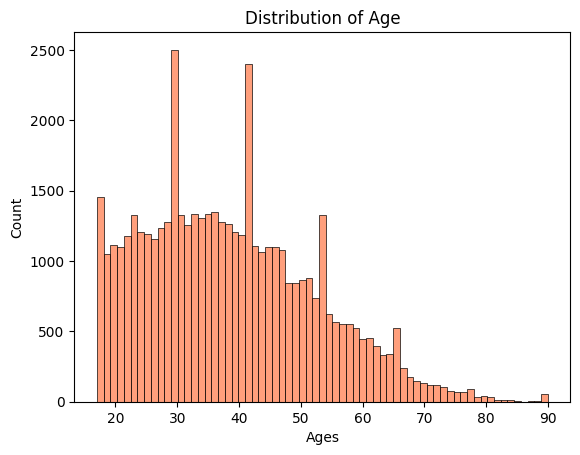

In [ ]:
sb.histplot(data=cci_std, x='age', color='coral')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Distribution of Age')
# more detailed

Text(0.5, 1.0, 'Distribution of Age')

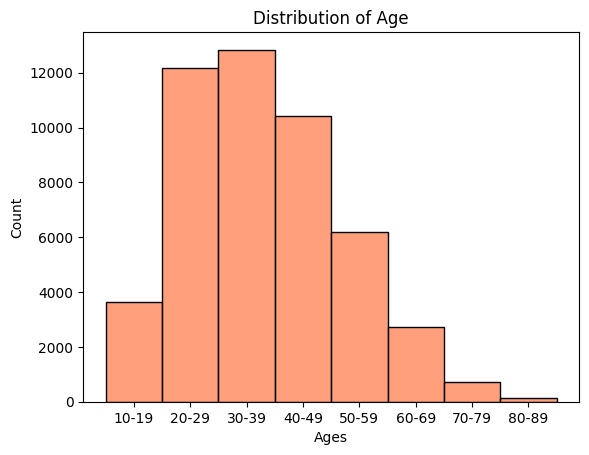

In [ ]:
sb.histplot(data=cci_std, x='age-range', color='coral')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Distribution of Age')
# compact

**EDUCATION**

This plot shows the education attained by the sample.

the plot shows that on average the education attained by the sample is around *HS Graduate* to *Some-Collage* and there are also noticeably some who pursued to get their *Bachelors*.

(for reference)

education and their corresponding education number :

- Preschool → 1
- 1st-4th → 2
- 5th-6th → 3
- 7th-8th → 4
- 9th → 5
- 10th → 6
- 11th → 7
- 12th → 8
- HS-grad →  9
- Some-college → 10
- Assoc-voc → 11
- Assoc-acdm → 12
- Bachelors → 13
- Masters → 14
- Prof-school → 15
- Doctorate → 16


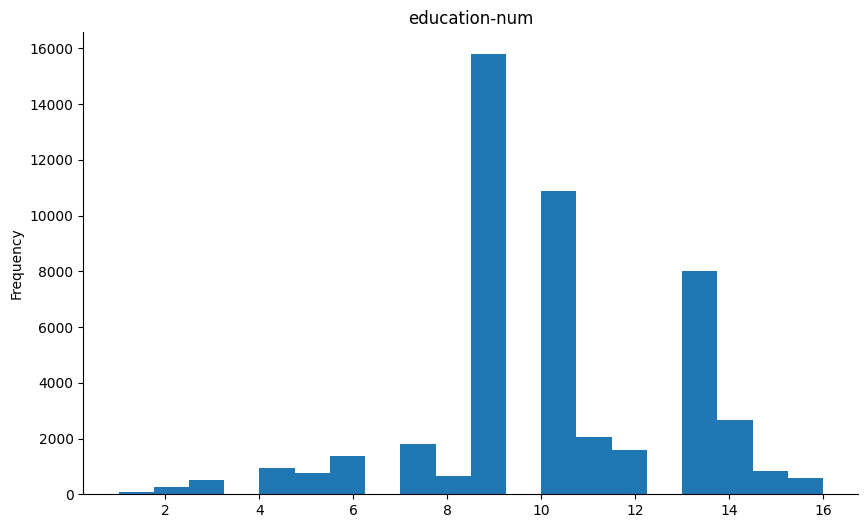

In [ ]:
cci_std['education-num'].plot(kind='hist', bins=20, title='education-num', figsize=(10,6))
plt.gca().spines[['top', 'right',]].set_visible(False)

**MARITAL STATUS**

This plot shows the marital status of the sample.

the plot shows that the most common marital statuses in the sample are *Married to a civillian spouse*, followed by *Never married*, and lastly *Divorced*

with some of the sample either *Widowed*, *Separated*, or *Married with absent spouse*, and with a very few of the sample that is *Married to a Spouse that is associated with the Armed Forces*.



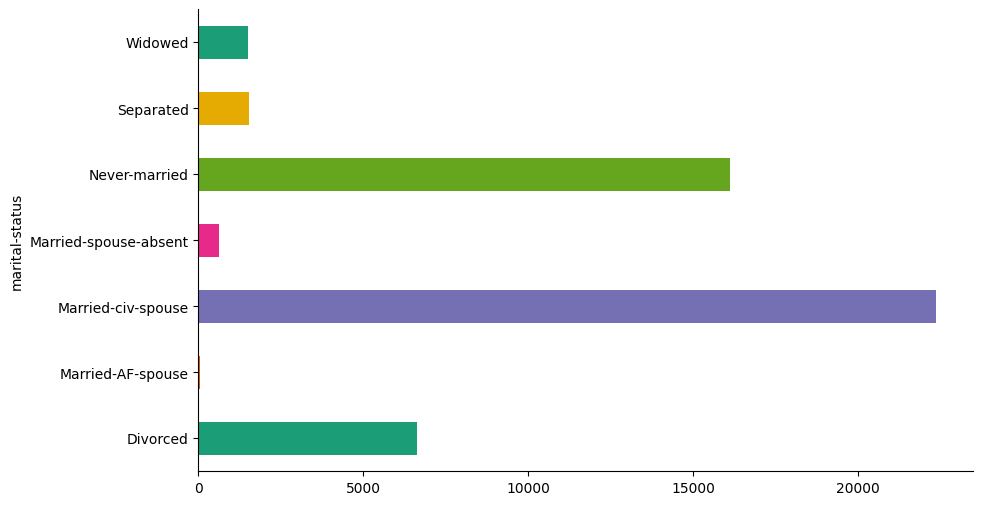

In [ ]:
cci_std.groupby('marital-status').size().plot(kind='barh', figsize=(10,6), color=sb.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**OCCUPATION**

This plot shows the occupations of the sample.

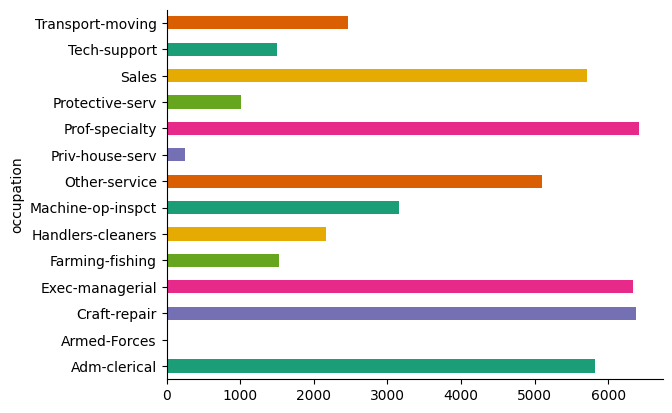

In [ ]:
cci_std.groupby('occupation').size().plot(kind='barh', color=sb.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**WORKCLASS**

This plot shows the workclass of the sample.

the plot shows that a lot of them works in a private company or such, while there are a few who works at the government or is self employed.

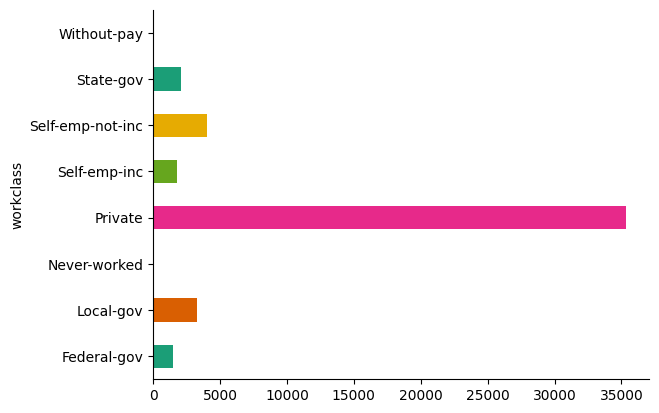

In [ ]:
cci_std.groupby('workclass').size().plot(kind='barh', color=sb.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**SEX & RACE**

The following plots shows the Sex and Race distribution of the sample.

the top plot shows that more than 15000 identifies as Females representing one portion of the sample and double that size identifies as Males which is more than 35000 representing the other porTion of the sample.

the bottom plot shows that even though the Population where the sample is taken is in the US, there are some other races that works in the US, they are possibly immigrants that seeks better opportunity abroad.

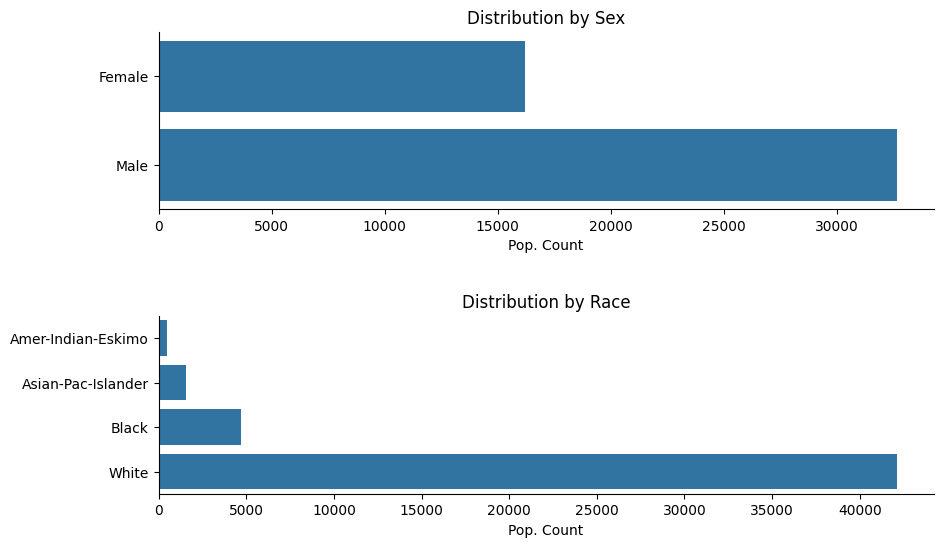

In [ ]:
fig, axes = plt.subplots(nrows=2, sharex=False, figsize=(10,6))

# count by gender (top subplot)
sex_counts = cci_std.groupby('sex').size()
sb.barplot(ax=axes[0], x=sex_counts, y=sex_counts.index, orient='h')
axes[0].set_title('Distribution by Sex')
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].set_xlabel('Pop. Count')
axes[0].set_ylabel('')

# count by race race (bottom subplot)
race_counts = cci_std.groupby('race').size()
sb.barplot(ax=axes[1], x=race_counts, y=race_counts.index, orient='h')
axes[1].set_title('Distribution by Race')
axes[1].spines[['top', 'right']].set_visible(False)
axes[1].set_xlabel('Pop. Count')
axes[1].set_ylabel('')

plt.subplots_adjust(hspace=0.6)

plt.show()

**INCOME**

The plot shows the income per year of the sample.

the plot shows that majority of the sample earns an income of less than 50K per year, and the others earn more than 50K per year

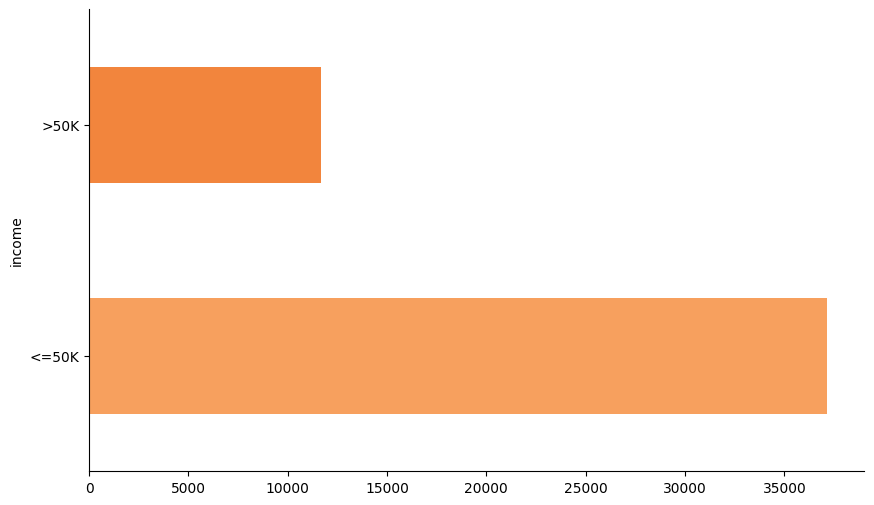

In [ ]:
cci_std.groupby('income').size().plot(kind='barh', figsize=(10,6), color=sb.color_palette(palette='Oranges_d'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# CORRELATION ANALYSIS

**CAPITAL GAIN/LOSS AND AGE**

- the graphs shows the trend of capital gain and loss according to their age, the 2 are complementary; the capital gain/loss increases as the individual grows older.

- the data sugggest that the sample tend to accumulate more capital gains (maybe from investment profits) as they grow older, specifically at around their 30s and peaks at their 40s, then it will stabilize and slowly decrease, this is probably because of having more time in their field therefore having higher income and better risk tolerance.

- capital loss seem to be noticably lower overall than capital gains, but they can always occur.


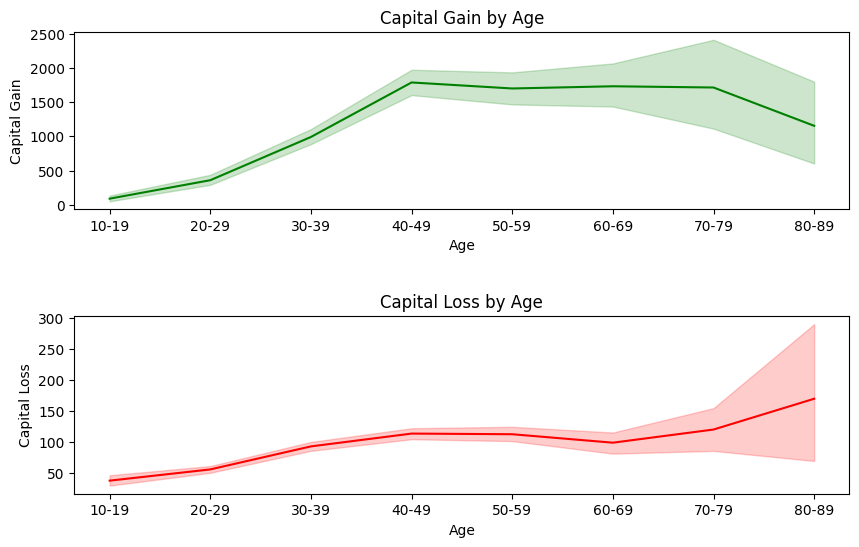

In [ ]:
fig, axes = plt.subplots(nrows=2, sharex=False, figsize=(10,6))

sb.lineplot(x='age-range', y='capital-gain', data=cci_std, color='green', ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Capital Gain')
axes[0].set_title('Capital Gain by Age')

sb.lineplot(x='age-range', y='capital-loss', data=cci_std, color='red', ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Capital Loss')
axes[1].set_title('Capital Loss by Age')

plt.subplots_adjust(hspace=0.6)
plt.show()

**IS INCOME TIED TO THE OCCUPATION OF AN INDIVIDUAL**

- the graph says a lot about it, with only 2 occupations that is close to each other when it comes to income (Exec-Manigerial & Prof-specialty), the rest shows that a lot of the individuals earns below 50K in these occupations and only some earns above 50K in that same occupations.

- the ones that earns above 50K in the jobs that the majority earns below 50K may be the ones that are the seasoned professionals, the ones that are in that job the longest and have a lot of experience hence the greater income.

<Axes: title={'center': 'Income = Occupation'}, ylabel='occupation'>

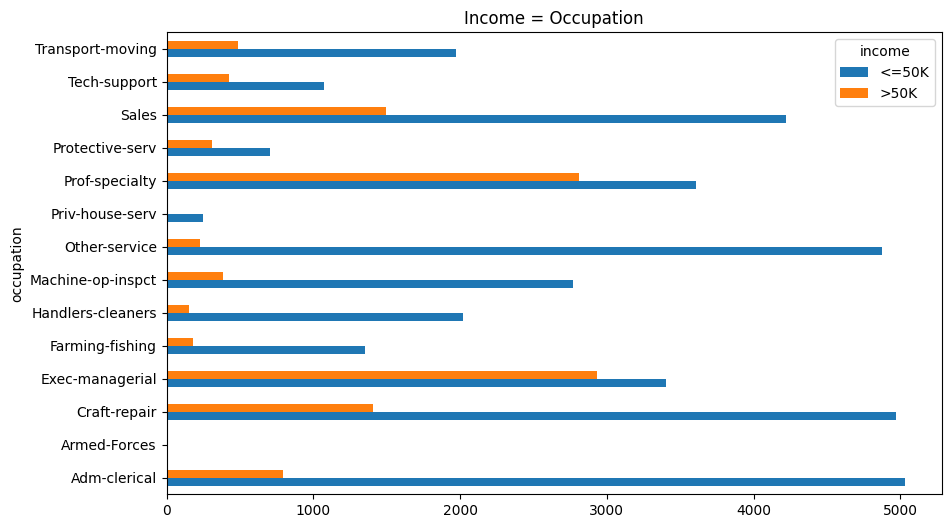

In [ ]:
oi = cci_std.groupby(['occupation','income']).size()
oi=oi.unstack()
oi.plot(kind='barh',title='Income = Occupation',figsize=(10,6))

**INCOME BASED ON THEIR WORK CLASS**

- we can ignore without pay here because it's self explanatory.
- this shows the incomes based on Work Class, working in private seems to not have a benefit, looking at the other classes it's close to each other, there's a possibility to earn more than what they are currently earning.

<Axes: title={'center': 'Income based on their Work Class'}, ylabel='workclass'>

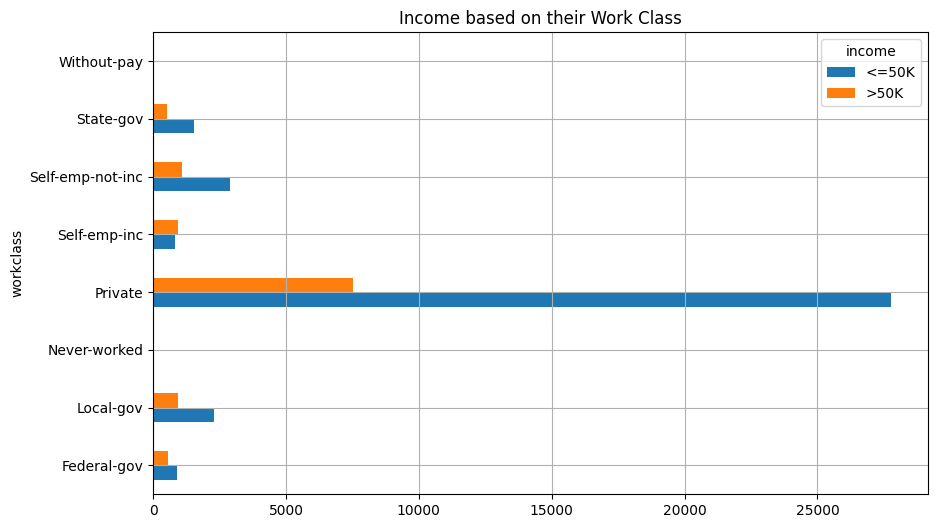

In [ ]:
wci = cci_std.groupby(['workclass','income']).size()
wci=wci.unstack()
wci.plot(kind = 'barh', grid = True, title = 'Income based on their Work Class',figsize=(10,6))

**INCOME BASED ON THEIR EDUCATIONAL ATTAINMENT**

- this shows that the ones who finished higher education tend to have income greater than 50K

<Axes: title={'center': 'Income based on their Educational attainment'}, ylabel='education'>

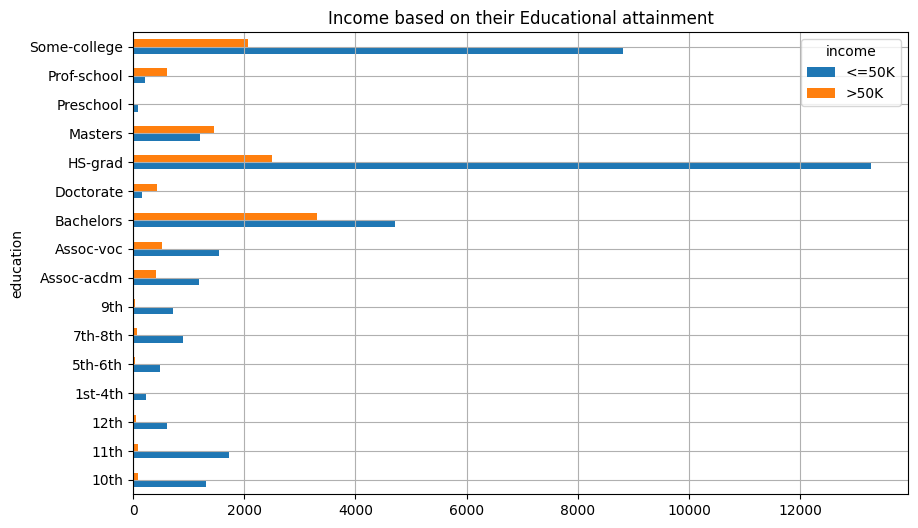

In [ ]:
ei = cci_std.groupby(['education','income']).size()
ei=ei.unstack()
ei.plot(kind = 'barh', grid = True, title = 'Income based on their Educational attainment',figsize=(10,6))